In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# As per the Probelm Statement I will have to predict the Happiness Score using given data. Here Happiness Score is the Target variable and rest all the columns are Features.

In [3]:
#Renaming columns for convenience.
df.rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score','Economy (GDP per Capita)':'GDP','Trust (Government Corruption)':'Curruption','Health (Life Expectancy)':'Life'}, inplace = True)

In [4]:
df.head()

,Country,Region,Rank,Score,Standard Error,GDP,Family,Life,Freedom,Curruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
#Droping unnecessary colums.
df = df.drop(columns = ['Standard Error','Dystopia Residual','Region','Family'])

In [6]:
df.head()

,Country,Rank,Score,GDP,Life,Freedom,Curruption,Generosity
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


In [7]:
#To check statistical description I will be using describe() method.
df.describe()

,Rank,Score,GDP,Life,Freedom,Curruption,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.025250,0.669730,0.551910,0.795880


In [8]:
#Checking for null values
df.isnull().sum()

Country       0
Rank          0
Score         0
GDP           0
Life          0
Freedom       0
Curruption    0
Generosity    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     158 non-null    object 
 1   Rank        158 non-null    int64  
 2   Score       158 non-null    float64
 3   GDP         158 non-null    float64
 4   Life        158 non-null    float64
 5   Freedom     158 non-null    float64
 6   Curruption  158 non-null    float64
 7   Generosity  158 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.0+ KB


# Observations.

1. No Null Values Present in the dataset.

2. Only one colum is Object datatype rest all are float and integer

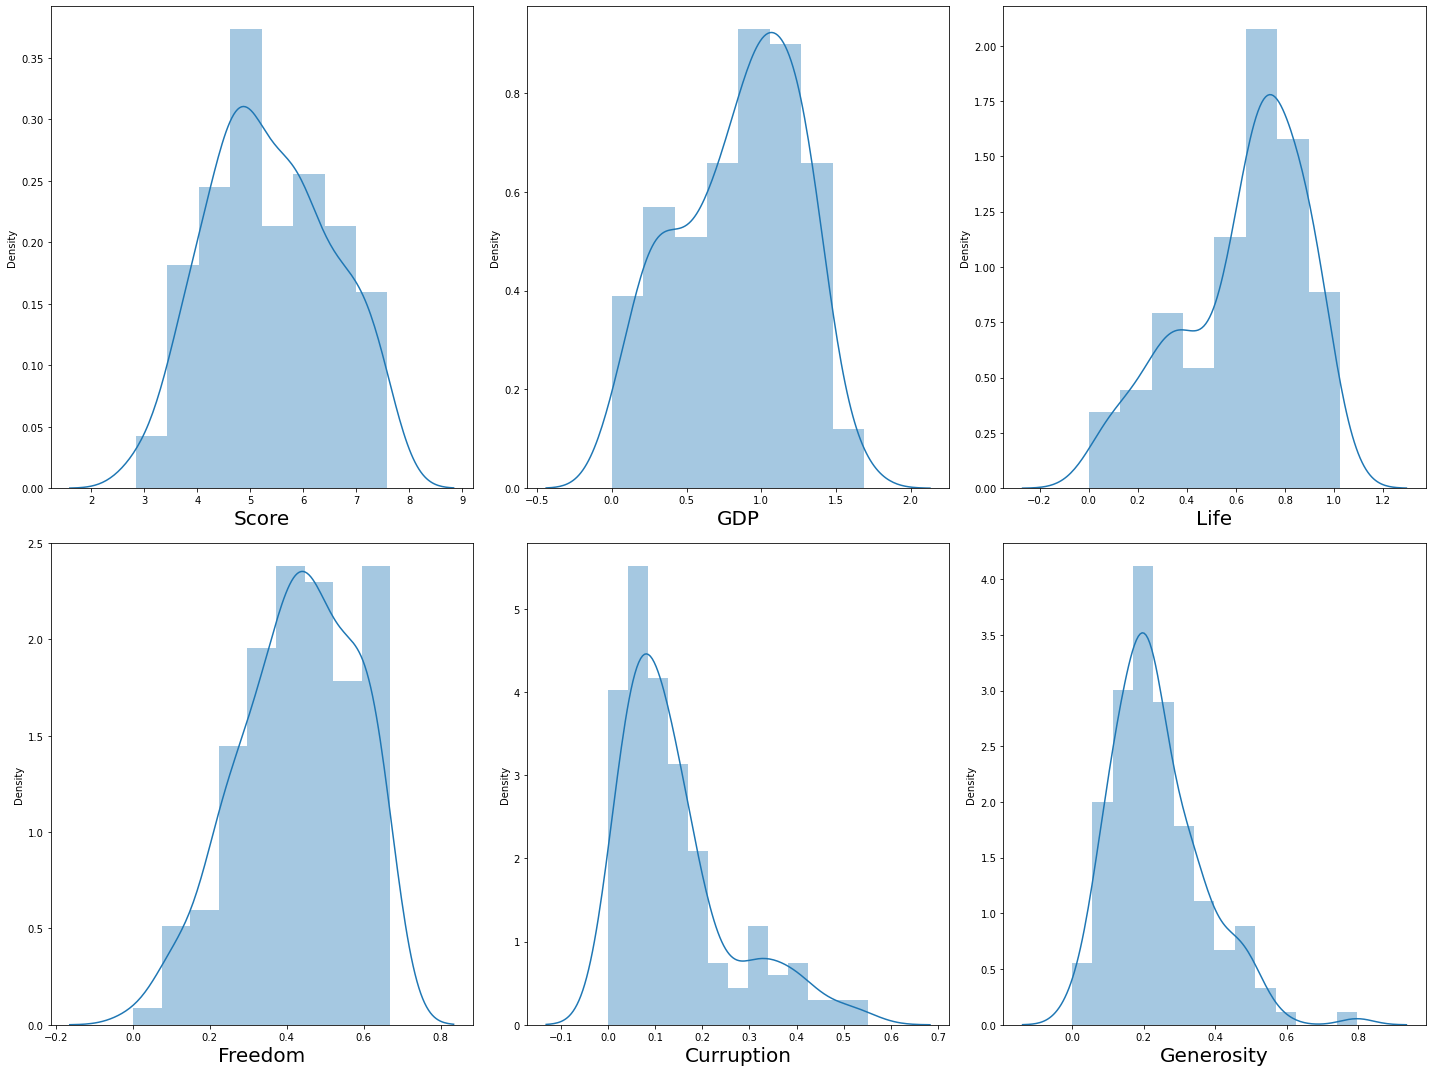

In [10]:
#Will Check how data is distributed for every column.
plt.figure(figsize = (20,15))

plotnumber = 1

for column in df[['Score','GDP','Life','Freedom','Curruption','Generosity']]:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

# Next will check if outliers present in the dataset, for that I will be using box.

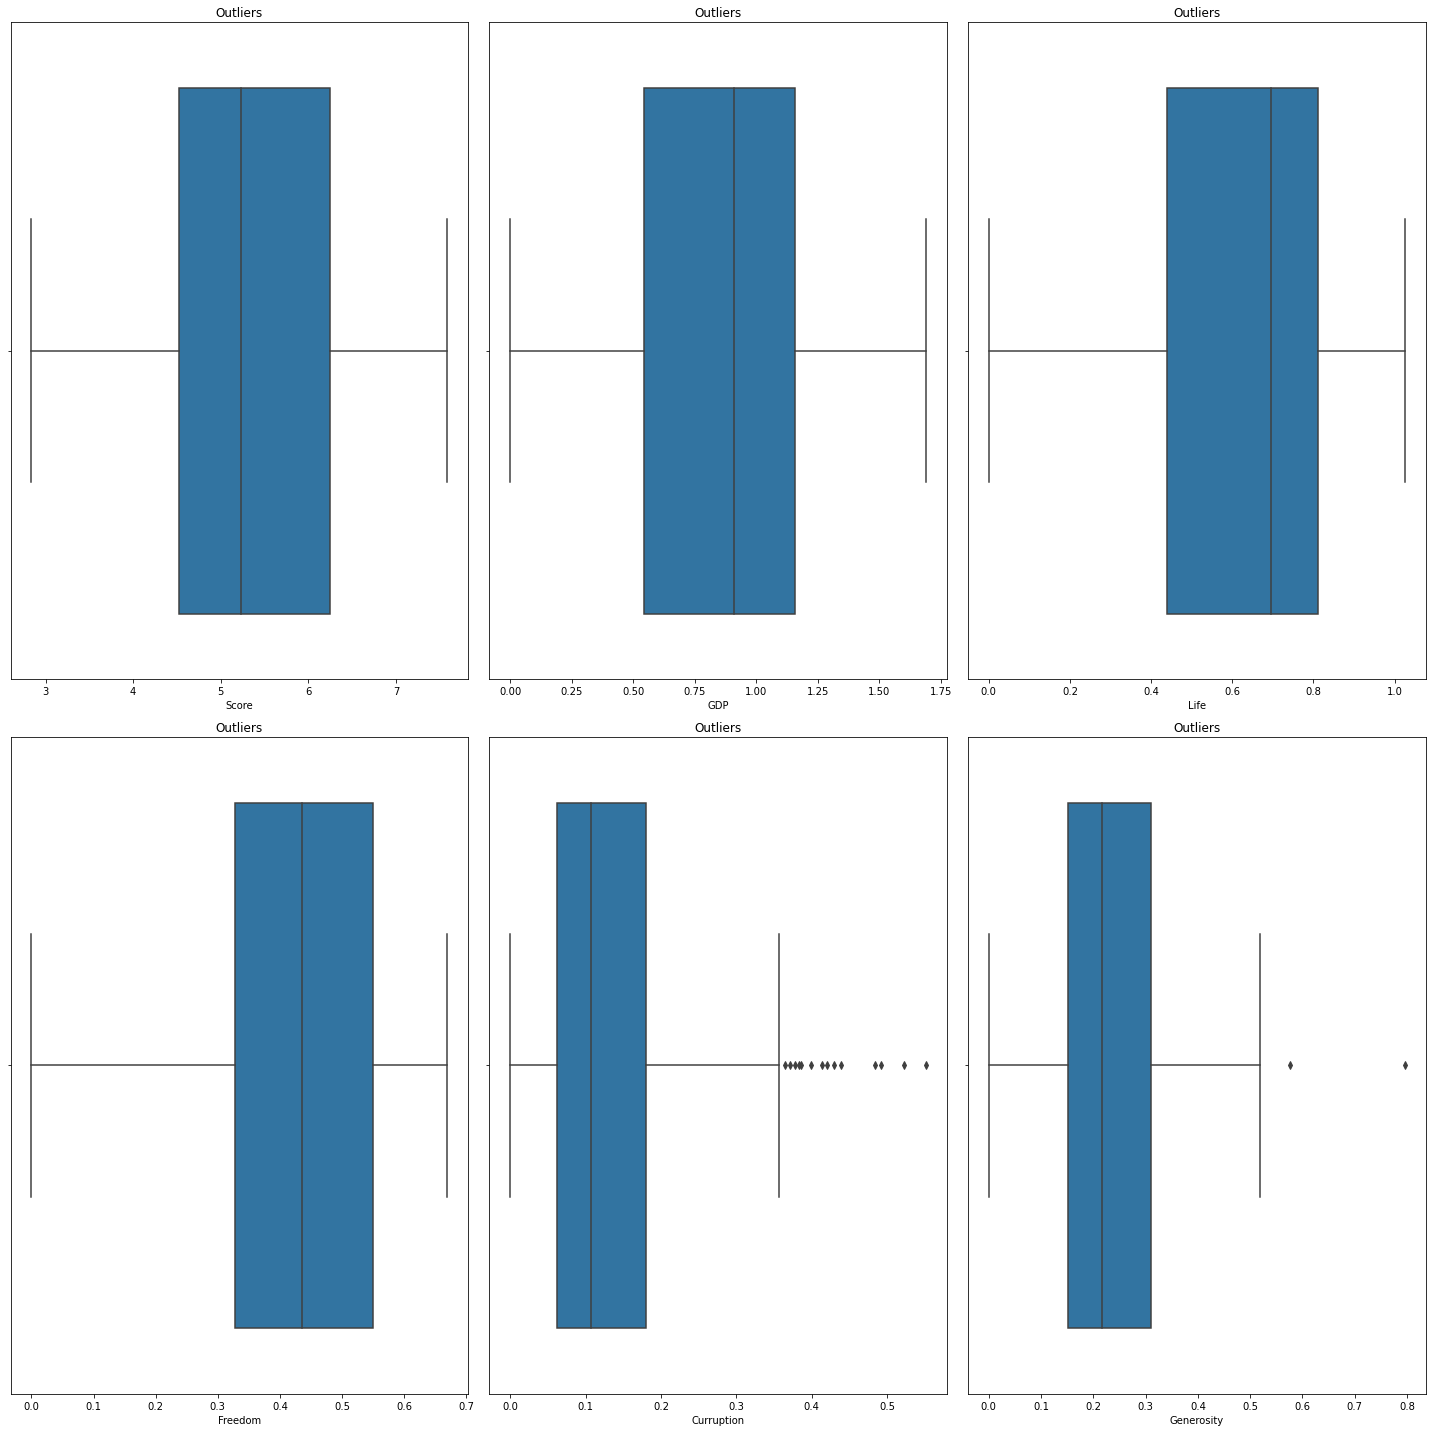

In [11]:
#Will implement boxplot to check outliers
plt.figure(figsize = (20,20))
plotnumber = 1

for column in df[['Score','GDP','Life','Freedom','Curruption','Generosity']]:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout() 

# From the box plot I can see outliers are present in Curruption and Generocity. Next will identify outliers using IQR method and remove them.

In [12]:
#Remove outliers for Curruption
def remove_outliers_Curruption(df):
    IQR = df['Curruption'].quantile(0.75) - df['Curruption'].quantile(0.25)
    
    higher_range = df['Curruption'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['Curruption'] >= higher_range, 'Curruption'] = higher_range

In [13]:
remove_outliers_Curruption(df)

In [14]:
#Remove outliers for Generosity
def remove_outliers_Generosity(df):
    IQR1 = df['Generosity'].quantile(0.75) - df['Generosity'].quantile(0.25)
    
    higher_range1 = df['Generosity'].quantile(0.75) + (1.5 * IQR1)
    
    df.loc[df['Generosity'] >= higher_range1, 'Generosity'] = higher_range1

In [15]:
remove_outliers_Generosity(df)

# Again I will implement box plot to confirm no more outliers are present in the dataset.

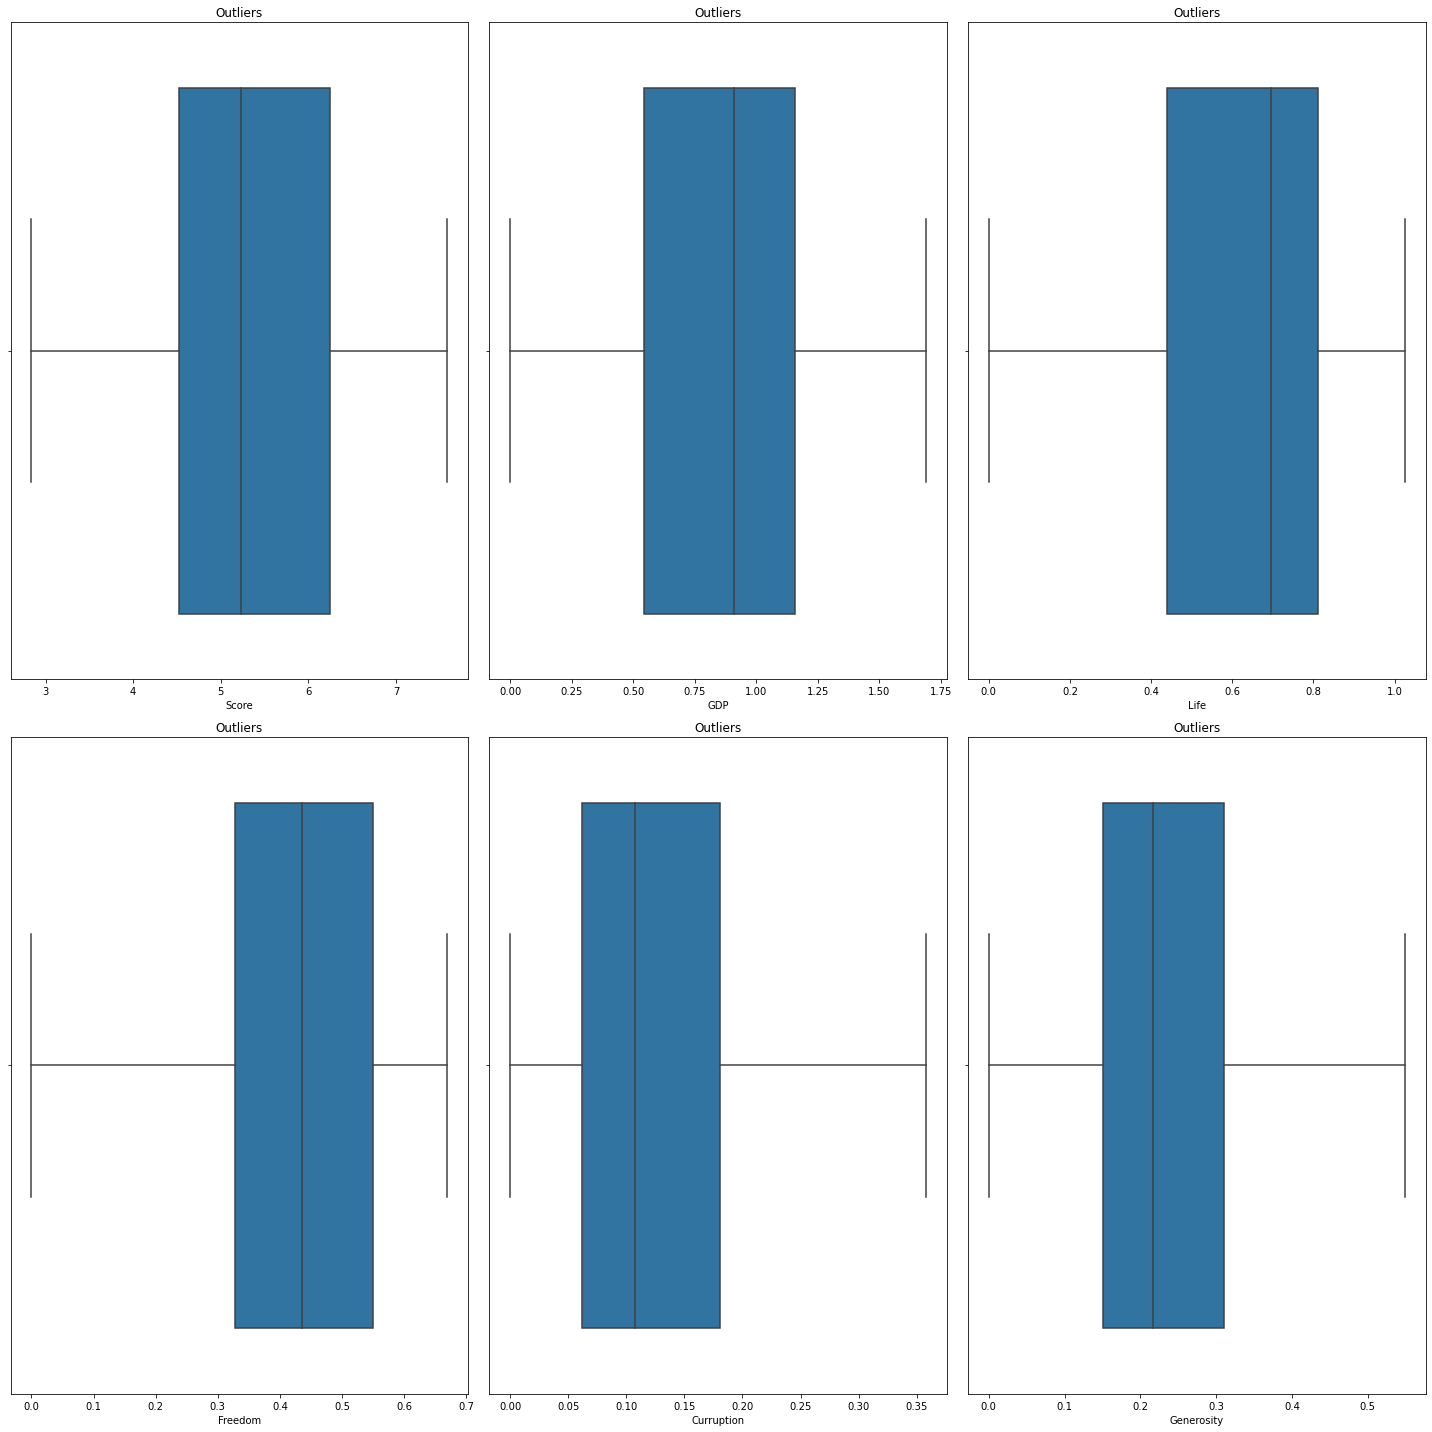

In [16]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in df[['Score','GDP','Life','Freedom','Curruption','Generosity']]:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout()

# All the outliers have been successfully removed using Inter Quantile Range Method. Next I will use encoding method for Country column to change object data into integers.

In [17]:
#Using Label Encoder technique to change object data into int.
from sklearn.preprocessing import LabelEncoder#Importing Label Encoder.

#Storing lable encoder into a variable.
lab_enc = LabelEncoder()

In [18]:
df1 = lab_enc.fit_transform(df['Country'])

pd.Series(df1)

df['Country'] = df1

df.head()

,Country,Rank,Score,GDP,Life,Freedom,Curruption,Generosity
0,135,1,7.587,1.39651,0.94143,0.66557,0.358125,0.29678
1,58,2,7.561,1.30232,0.94784,0.62877,0.141450,0.43630
2,37,3,7.527,1.32548,0.87464,0.64938,0.358125,0.34139
3,105,4,7.522,1.45900,0.88521,0.66973,0.358125,0.34699
4,24,5,7.427,1.32629,0.90563,0.63297,0.329570,0.45811


# Next I'll be using heat map to observ relationship between features and label.

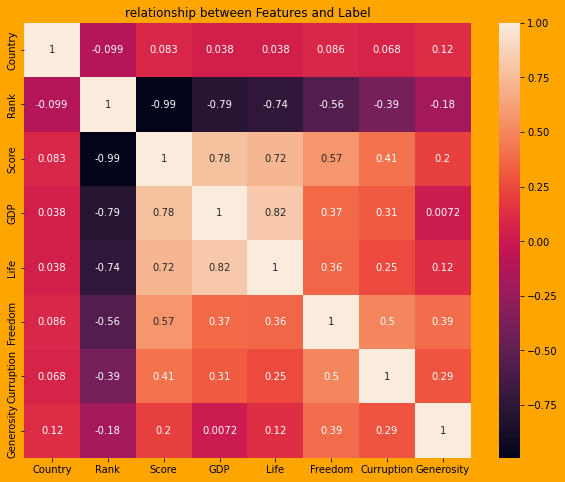

In [19]:
#Using heatmap to check relationship between features and label.
plt.figure(figsize=(10,8),facecolor='orange')
sns.heatmap(df.corr(),annot=True)
plt.title('relationship between Features and Label')
plt.show()

# Rank has strong negative correlation with Score, Country has less contribution in oder to predict label. Also, as per heatmap GDP and Life expectancy are strongly correlated. I will drop rank and country as of now.

In [20]:
#Droping Country and Rank.
df = df.drop(columns = ['Country','Rank'])

In [21]:
df.head()

,Score,GDP,Life,Freedom,Curruption,Generosity
0,7.587,1.39651,0.94143,0.66557,0.358125,0.29678
1,7.561,1.30232,0.94784,0.62877,0.141450,0.43630
2,7.527,1.32548,0.87464,0.64938,0.358125,0.34139
3,7.522,1.45900,0.88521,0.66973,0.358125,0.34699
4,7.427,1.32629,0.90563,0.63297,0.329570,0.45811


# Will investigate further and check correlation between GDP and Score.

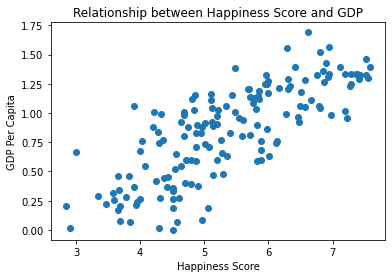

In [22]:
#Using Scatter Plot to analyse relatioship between GDP and Happiness Score.
gdp = df['GDP']
happiness_score = df['Score']

plt.scatter(happiness_score, gdp)
plt.title('Relationship between Happiness Score and GDP')
plt.xlabel('Happiness Score')
plt.ylabel('GDP Per Capita')
plt.show()

# Next I will analyse the relationship between Life expectancy and Happiness Score.

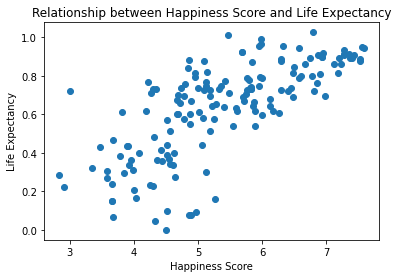

In [23]:
#Using Scatter Plot to analyse relatioship between GDP and Happiness Score.
life = df['Life']

plt.scatter(happiness_score, life)
plt.title('Relationship between Happiness Score and Life Expectancy')
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.show()

# Life Expectancy is less correlated with Score than GDP so I will go ahead and remove Life Expectancy column from the dataset.

In [24]:
df = df.drop(columns = 'Life')

In [25]:
df.head()

,Score,GDP,Freedom,Curruption,Generosity
0,7.587,1.39651,0.66557,0.358125,0.29678
1,7.561,1.30232,0.62877,0.141450,0.43630
2,7.527,1.32548,0.64938,0.358125,0.34139
3,7.522,1.45900,0.66973,0.358125,0.34699
4,7.427,1.32629,0.63297,0.329570,0.45811


# Next I will split data into X and Y variable.

In [26]:
x = df.drop(columns = 'Score')
y = df['Score']

In [27]:
x.shape

(158, 4)

In [28]:
y.shape

(158,)

In [29]:
#Import Standrd Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [30]:
x_scaled

array([[ 1.36962124,  1.57743784,  2.13372468,  0.50892093],
       [ 1.13522625,  1.33245589,  0.04324441,  1.66872279],
       [ 1.19286069,  1.4696591 ,  2.13372468,  0.87975494],
       [ 1.52512972,  1.60513145,  2.13372468,  0.92630662],
       [ 1.1948764 ,  1.36041579,  1.85822606,  1.85002496],
       [ 1.10518965,  1.41846586,  2.13372468, -0.01702993],
       [ 1.20271529,  1.24584679,  1.74794942,  1.99957223],
       [ 1.20836426,  1.53902627,  2.13372468,  1.05623569],
       [ 1.0054741 ,  1.40308792,  2.13372468,  1.99051128],
       [ 1.21301782,  1.48204134,  2.11679244,  1.66307009],
       [ 0.95169689, -0.10268563, -0.57036835,  0.79937016],
       [ 0.27284977,  1.36567491, -0.30041733,  0.16136276],
       [ 1.22210096,  1.30289829,  0.48039526,  0.79238741],
       [ 0.43400721,  0.35412582,  0.73471653, -0.78820839],
       [ 1.36464418,  0.78171251,  0.211602  ,  1.37569659],
       [ 0.33620784,  0.4119096 ,  0.36896087, -0.74664439],
       [ 1.78620179,  1.

# Spliting data into train and test.

In [36]:
#importing train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 52)

In [37]:
#Importing Linear Regression and training the model.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(x_test)

# Model Evaluation

In [41]:
#Will import R2 metric.
from sklearn.metrics import r2_score

In [42]:
r2_score(y_test,y_pred)

0.7410915786864669

In [43]:
#Let's check how well model fits on train data

#Adjusted R2 score
lr.score(x_train,y_train)

0.6961307642382351

In [44]:
#Let's check how well model fits on test data

#Adjusted R2 score

lr.score(x_test,y_test)

0.7410915786864669

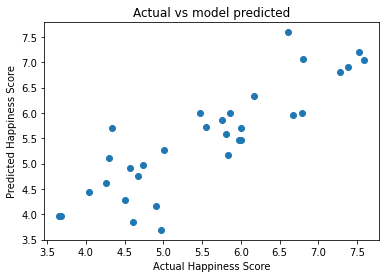

In [45]:
#I will plot a scatter plot to observ how well our model is Predicting the label.
plt.scatter(y_test,y_pred)

plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs model predicted')

plt.show()

In [46]:
#Importing Mean Squared Error and Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
#MAE

mean_absolute_error(y_test,y_pred)

0.47874571490088935

In [48]:
#MSE

mean_squared_error(y_test,y_pred)

0.32894029724076523

In [49]:
#RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

0.5735331701312185

In [50]:
#LASSO CV will return best alpha after max iteration

#Normalize is subastracting the mean and deviding by the l2 form

from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [51]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)

lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [52]:
#Best alpha parameter

alpha = lasscv.alpha_

alpha

7.941642449708466e-05

In [53]:
#Now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train, y_train)

Lasso(alpha=7.941642449708466e-05)

In [54]:
lasso_reg.score(x_test,y_test)

0.7410894388716394

In [55]:
#RidgeCV will return best alpha and coefficients after performing 10 cross validation

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

0.030999999999999996

In [56]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.7411270335734249

In [59]:
data_frame = pd.DataFrame({'Actual Happiness Score':y_test,'Predicted Happiness Score':y_pred})
data_frame = data_frame.style.hide_index()
data_frame

Actual Happiness Score,Predicted Happiness Score
4.033000,4.446074
6.798000,7.056224
4.565000,4.903723
5.975000,5.462047
6.003000,5.472968
3.678000,3.957728
6.611000,7.592266
7.286000,6.813815
5.855000,5.992999
4.507000,4.278821
